#Project On- Classify plant village color diseases

Downloading Dataset From Kaggle

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/plantvillage-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
for dirpath, dirnames, filenames in os.walk("/content/plantvillage dataset"):
    print(f" There are {len(dirnames)} Directories and {len(filenames)} images in {dirpath}")

 There are 3 Directories and 0 images in /content/plantvillage dataset
 There are 38 Directories and 0 images in /content/plantvillage dataset/color
 There are 0 Directories and 1052 images in /content/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew
 There are 0 Directories and 360 images in /content/plantvillage dataset/color/Peach___healthy
 There are 0 Directories and 1909 images in /content/plantvillage dataset/color/Tomato___Late_blight
 There are 0 Directories and 373 images in /content/plantvillage dataset/color/Tomato___Tomato_mosaic_virus
 There are 0 Directories and 621 images in /content/plantvillage dataset/color/Apple___Black_rot
 There are 0 Directories and 1676 images in /content/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite
 There are 0 Directories and 1771 images in /content/plantvillage dataset/color/Tomato___Septoria_leaf_spot
 There are 0 Directories and 1835 images in /content/plantvillage dataset/color/Squash___Powder

Importing Modules

In [6]:
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models


In [7]:
import pathlib
data_directory = pathlib.Path("/content/plantvillage dataset/color/")
class_names = np.array(sorted(item.name for item in data_directory.glob("*")))
class_names

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
       'Strawberry___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
   

Random Image

In [29]:
def view_random_image(target_dir="/content/plantvillage dataset/color/", target_class=""):
    target_fol = target_dir + target_class
    images = list(pathlib.Path(target_fol).glob('*'))
    random_image_path = random.choice(images)
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title("Image")
    plt.axis("off")

    print(f"Image shape: {img.shape}")


Image shape: (256, 256, 3)


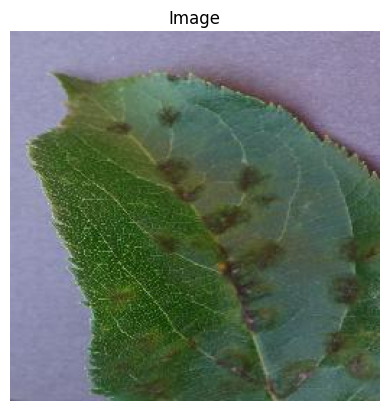

In [30]:
view_random_image(target_class="Apple___Apple_scab")

In [10]:
image_size =224
batch_size = 32
base_dir="/content/plantvillage dataset/color/"

##Splitting Data into Train and Test

In [11]:
data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

In [12]:
train_gen = data_generator.flow_from_directory(
    base_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


Found 38029 images belonging to 38 classes.


In [13]:
test_gen = data_generator.flow_from_directory(
    base_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 16276 images belonging to 38 classes.


#Adding Layers to the Model

In [19]:
model = models.Sequential()

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(image_size, image_size, 3), kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Dropout(0.20))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Dropout(0.20))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Dropout(0.20))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(layers.Dense(train_gen.num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 56, 56, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)       

##Traning the Model

In [22]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=5,
    validation_data=test_gen,
    validation_steps=test_gen.samples // batch_size,
    verbose=1
)


Epoch 1/5
1188/1188 [==============================] - 97s 82ms/step - loss: 0.3670 - accuracy: 0.8834 - val_loss: 0.2989 - val_accuracy: 0.9033
Epoch 2/5
1188/1188 [==============================] - 98s 82ms/step - loss: 0.2482 - accuracy: 0.9179 - val_loss: 0.3196 - val_accuracy: 0.8996
Epoch 3/5
1188/1188 [==============================] - 95s 80ms/step - loss: 0.1773 - accuracy: 0.9414 - val_loss: 0.3191 - val_accuracy: 0.9047
Epoch 4/5
1188/1188 [==============================] - 113s 95ms/step - loss: 0.1431 - accuracy: 0.9524 - val_loss: 0.2902 - val_accuracy: 0.9126
Epoch 5/5
1188/1188 [==============================] - 113s 95ms/step - loss: 0.1244 - accuracy: 0.9584 - val_loss: 0.2782 - val_accuracy: 0.9187


In [35]:
loss,acc=model.evaluate(test_gen,steps = test_gen.samples // batch_size)
print(f"Accuracy: {acc :.2%}")



508/508 [==============================] - 27s 53ms/step - loss: 0.2783 - accuracy: 0.9187
Accuracy: 91.87%


In [33]:
def plot_loss_curves(history, figsize):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))


  # Plot loss
  plt.figure(figsize = figsize)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure(figsize = figsize)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

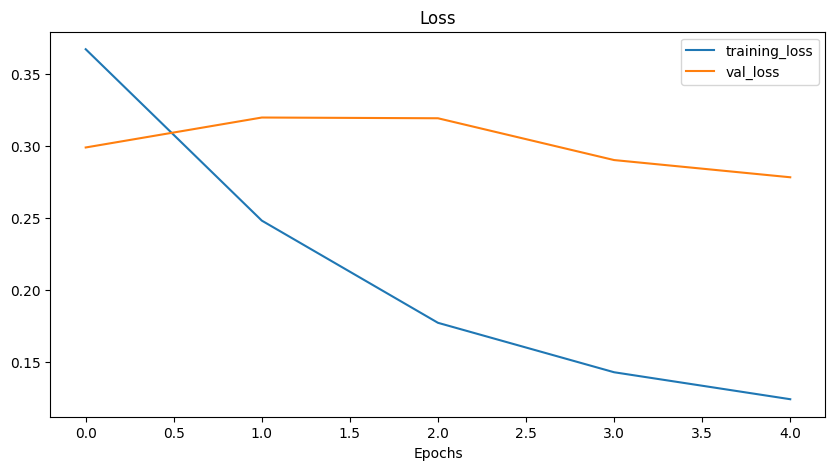

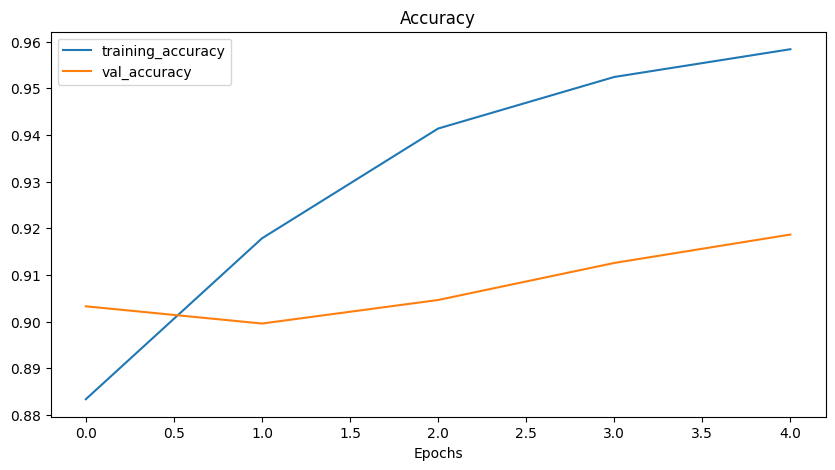

In [34]:
plot_loss_curves(history, figsize = (10, 5))